In [1]:
from relaqs import RESULTS_DIR
from relaqs.api import load_pickled_env_data
import numpy as np

2025-02-04 11:15:20,797	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-04 11:15:21,127	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-04 11:15:22,309	WARNING __init__.py:10 -- DDPG has/have been moved to `rllib_contrib` and will no longer be maintained by the RLlib team. You can still use it/them normally inside RLlib util Ray 2.8, but from Ray 2.9 on, all `rllib_contrib` algorithms will no longer be part of the core repo, and will therefore have to be installed separately with pinned dependencies for e.g. ray[rllib] and other packages! See https://github.com/ray-project/ray/tree/master/rllib_contrib#rllib-contrib for more information on the RLlib contrib effort.


In [2]:
path = '2025-01-21_10-40-03_arbitrary-gate'
data_path = RESULTS_DIR + path + '/env_data.pkl'

In [ ]:
df = load_pickled_env_data(data_path)
last_n_episodes = 1000
n_steps_per_episode = 2

last_step_of_episode_indices = []
current_episode_id = df["Episode Id"].iloc[-1]

for i in df.index[::-1]:
    episode_id = df["Episode Id"][i] 
    end_of_episode = True if episode_id != current_episode_id else False
    if end_of_episode:
        last_step_of_episode_indices.append(i)
        current_episode_id = episode_id
    if len(last_step_of_episode_indices) == last_n_episodes:
        break

In [4]:
fidelity = df["Fidelity"][last_step_of_episode_indices]
reward = df["Rewards"][last_step_of_episode_indices]
actions = df["Actions"][last_step_of_episode_indices]
operator = df["Operator"][last_step_of_episode_indices]
target_operator = df["Target Operator"][last_step_of_episode_indices]
episode_id = df["Episode Id"][last_step_of_episode_indices]

n_lowest = 10
fidelities_np = fidelity.to_numpy()
lowest_fidelities = np.partition(fidelities_np, n_lowest)[:n_lowest]
lowest_fidelities_indices = np.argsort(fidelities_np)[:n_lowest]

lowest_fidelities_operators = operator.to_numpy()[lowest_fidelities_indices]
lowest_fidelity_target_operators = target_operator.to_numpy()[lowest_fidelities_indices]

print("Target operators corresponding to the worst fidelity:")
for i in range(n_lowest):
    print("Fidelity:", lowest_fidelities[i])
    print("Target:", lowest_fidelity_target_operators[i])
    print("Operator:", lowest_fidelities_operators[i], "\n")

Target operators corresponding to the worst fidelity:
Fidelity: 0.00019971168582648722
Target: [[-0.17243637-0.09631856j -0.71739519+0.66808126j]
 [ 0.71739519+0.66808126j -0.17243637+0.09631856j]]
Operator: [[-0.53212266+0.84643383j  0.01917725+0.00524229j]
 [-0.01917725+0.00524229j -0.53212266-0.84643383j]] 

Fidelity: 2.5375739750851487e-05
Target: [[-0.75391474+0.43727089j -0.48566104-0.06738011j]
 [ 0.48566104-0.06738011j -0.75391474-0.43727089j]]
Operator: [[ 0.49954978+0.86625049j  0.00380601+0.00675449j]
 [-0.00380601+0.00675449j  0.49954978-0.86625049j]] 

Fidelity: 0.00013537076262157722
Target: [[ 0.02842779-0.1577935j  -0.93727325-0.30953502j]
 [ 0.93727325-0.30953502j  0.02842779+0.1577935j ]]
Operator: [[-0.99826326+0.02354267j -0.01712211-0.05121553j]
 [ 0.01712211-0.05121553j -0.99826326-0.02354267j]] 

Fidelity: 0.00019219755055864627
Target: [[ 0.05717763+0.14132019j -0.98238187-0.10809803j]
 [ 0.98238187-0.10809803j  0.05717763-0.14132019j]]
Operator: [[-0.9239687 +0

In [5]:
import qutip

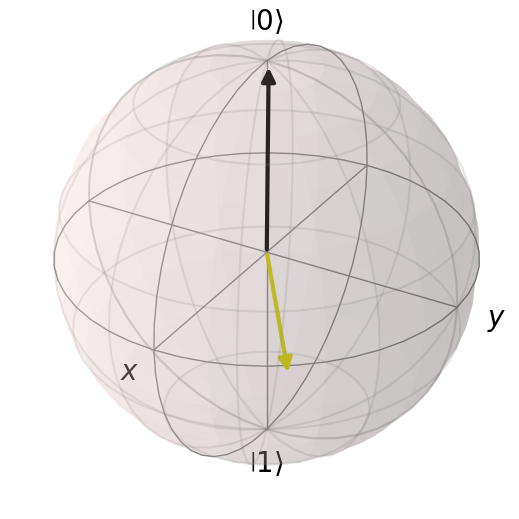

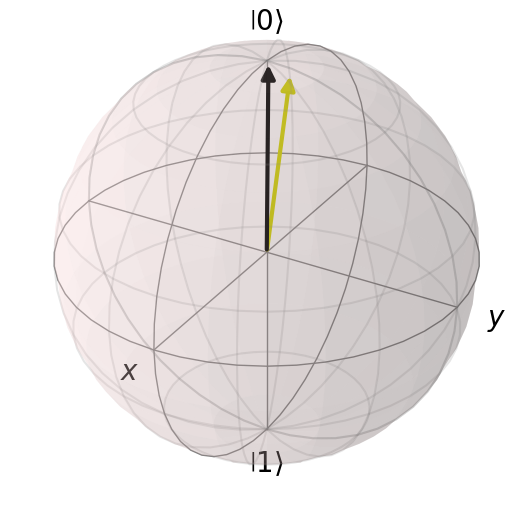

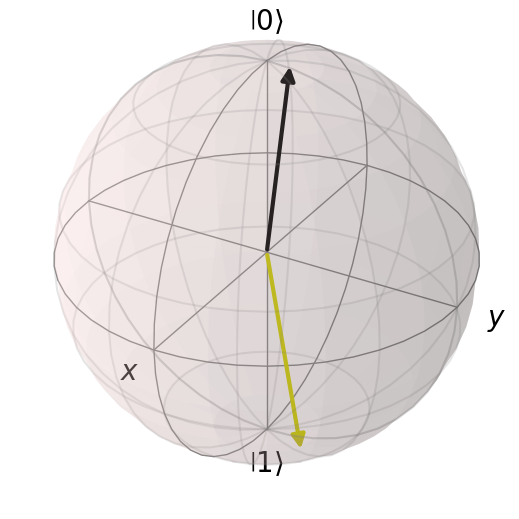

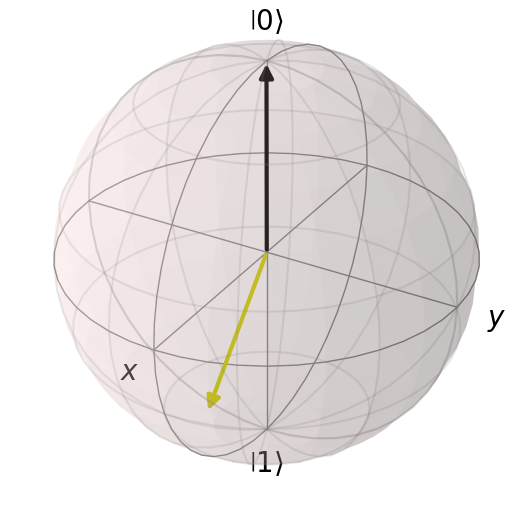

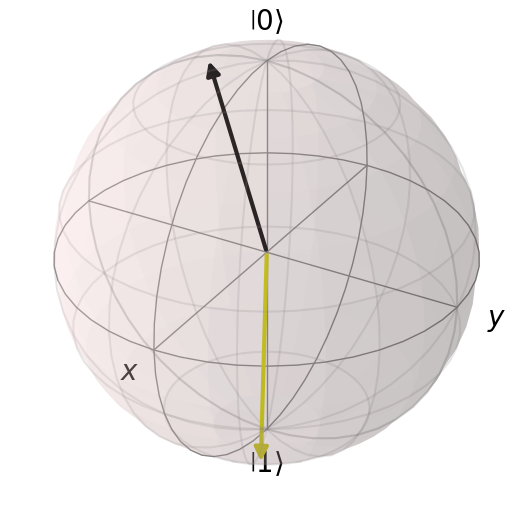

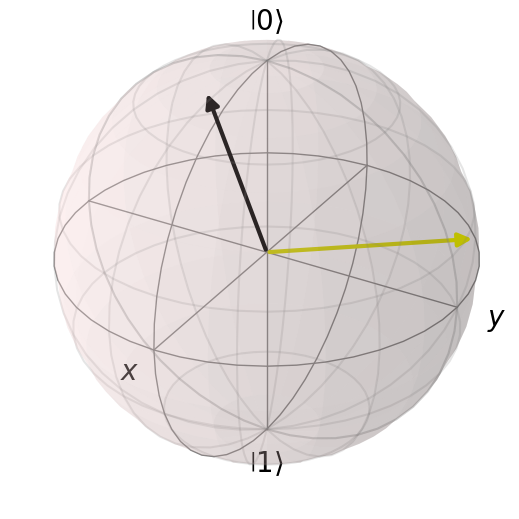

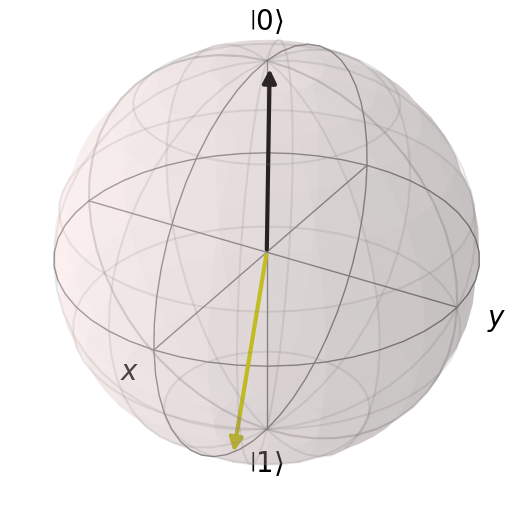

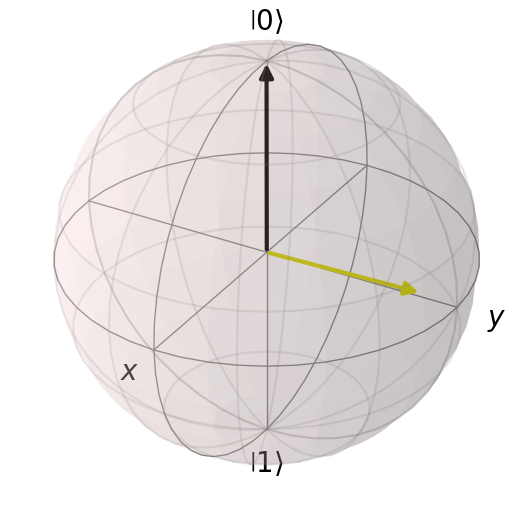

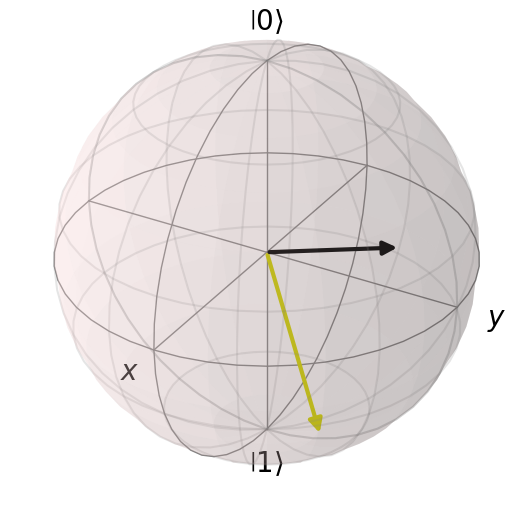

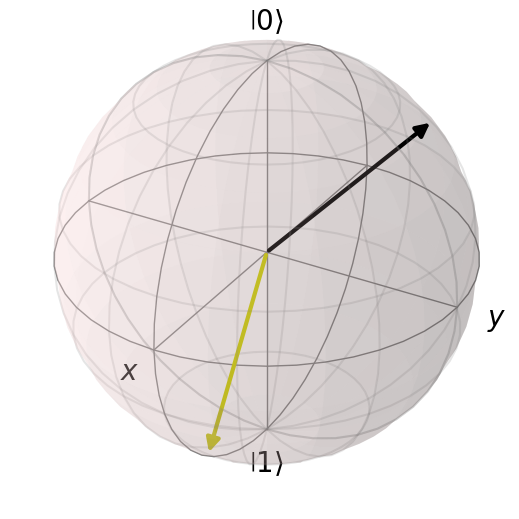

In [6]:
target_states = [np.matmul(operator, np.array([1, 0])) for operator in lowest_fidelity_target_operators]
final_states = [np.matmul(operator, np.array([1, 0])) for operator in lowest_fidelities_operators]

for i in range(10):
    q_objs = [qutip.Qobj(target_states[i]), qutip.Qobj(final_states[i])]

    b = qutip.Bloch()
    b.add_states(q_objs)
    b.vector_color = ['y', 'k']
    b.show()